In [143]:
# !pip install pydot
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
import numpy as np
from datetime import date
from keras.preprocessing import timeseries_dataset_from_array
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import pydot

In [144]:
def load_ts_data(stock_name='GSIT'):
    stocks_df = pd.read_pickle('./data/stocks_df_{}.pickle'.format(date.today()))
    input_data = np.array(stocks_df[stocks_df.company_name == stock_name].iloc[:-60]['Adj Close'])
    targets = np.array(stocks_df[stocks_df.company_name == stock_name].iloc[60:]['Adj Close'])
    ts_dataset = timeseries_dataset_from_array(
        input_data, targets, sequence_length=60)
    return ts_dataset

In [145]:
def plot_stock_close(stock_name='GSIT'):
    try:
        stocks_df = pd.read_pickle('./data/stocks_df_{}.pickle'.format(date.today()))
    except:
        print('rerun stock_data_ingestion.py to get up-to-date data')
    stock_ts = stocks_df[stocks_df.company_name == stock_name]['Adj Close']
    # ax = sns.scatterplot(data=stock_ts)
    ax = sns.lineplot(data=stock_ts)
    plt.show()

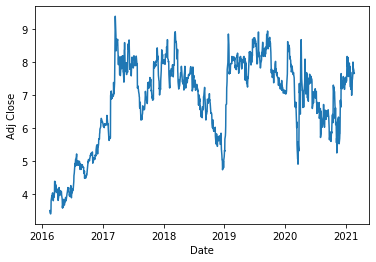

In [146]:
plot_stock_close()

In [147]:
def run(stock_name='GSIT'):
    ts_data = load_ts_data(stock_name)
    return ts_data
ts_data = run()
print(ts_data.cardinality())
for batch in ts_data:
    indata, target = batch
    print(indata.shape, target.shape)

tf.Tensor(9, shape=(), dtype=int64)
(128, 60) (128,)
(128, 60) (128,)
(128, 60) (128,)
(128, 60) (128,)
(128, 60) (128,)
(128, 60) (128,)
(128, 60) (128,)
(128, 60) (128,)
(117, 60) (117,)


In [148]:
def make_model(input_shape=(128, 60)):

    input_layer = keras.layers.Input(input_shape)
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(1, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)
model = make_model(input_shape=(128, 60))
keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [135]:
model.fit(ts_data)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.